**SALES PREDICTION USING PYTHON**

In [12]:
#Importing all necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')


In [13]:
#Importing the dataset
sales_dataset=pd.read_csv("/content/Sales.csv")

In [14]:
#Viewing the first 5 rows in the dataset
sales_dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [15]:
#Knowing the shape
sales_dataset.shape

(200, 4)

In [16]:
#Dataset Information
sales_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [17]:
#Describe the dataset
sales_dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## **Data Cleaning**

In [18]:
#Checking the null values
sales_dataset.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [19]:
#checking the duplicate values
sales_dataset[sales_dataset.duplicated()]

,TV,Radio,Newspaper,Sales


## **Data Analysis**

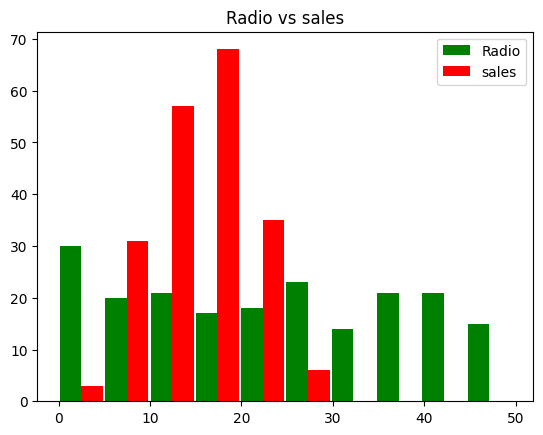

In [20]:
radio=sales_dataset['Radio']
sales=sales_dataset['Sales']
plt.title("Radio vs sales")

plt.hist([radio,sales], rwidth=0.95, color=['green','red'],label=['Radio','sales'])
plt.legend()


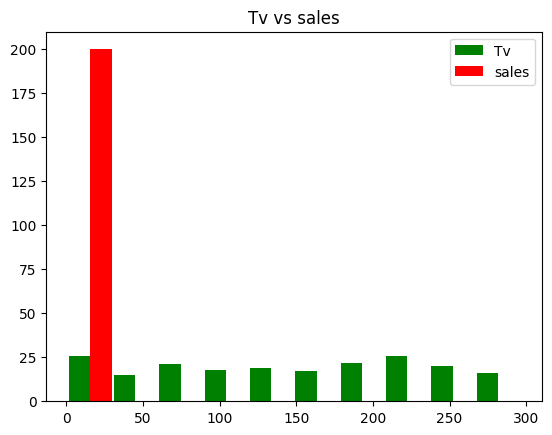

In [21]:
tv=sales_dataset['TV']
sales=sales_dataset['Sales']
plt.title("Tv vs sales")

plt.hist([tv,sales], rwidth=0.95, color=['green','red'],label=['Tv','sales'])
plt.legend()


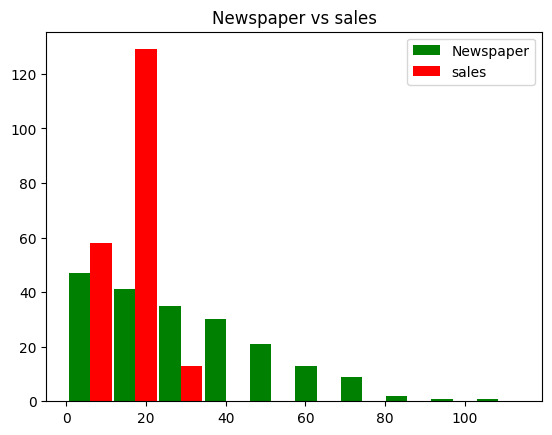

In [22]:
news_paper=sales_dataset['Newspaper']
sales=sales_dataset['Sales']
plt.title("Newspaper vs sales")

plt.hist([news_paper,sales], rwidth=0.95, color=['green','red'],label=['Newspaper','sales'])
plt.legend()


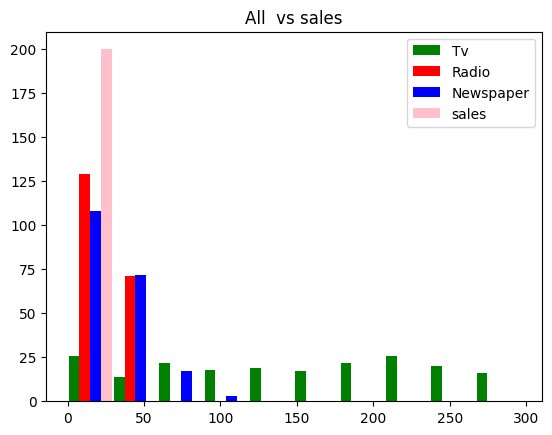

In [23]:
radio=sales_dataset['Radio']
sales=sales_dataset['Sales']
Tv=sales_dataset['TV']
Newspaper	=sales_dataset['Newspaper']

plt.title("All  vs sales")

plt.hist([Tv,radio,Newspaper,sales], rwidth=0.95, color=['green','red','blue','pink'],label=['Tv','Radio','Newspaper','sales'])
plt.legend()

From the above Visualisations, we can say that if we spend a amount between 10 to 30 range in all promotions the sales was good.

==> But if we spend high amount that means above 40 then the sales will not sold out.

## **Data Mining**

**Linear Regression**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
X = sales_dataset.drop('Sales',axis='columns')
y = sales_dataset['Sales']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)


In [28]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 1.8741138418894416
R-squared Score: 0.9217965732000767


**Decesion Tree**

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [31]:
y_pred = model.predict(X_test)


In [32]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 1.68
Root Mean Squared Error: 1.30
R-squared Score: 0.93


**Support Vector Machine-Regressor**

In [33]:
from sklearn.svm import SVR

In [34]:
# Initialize SVR with a radial basis function kernel
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [35]:
y_pred = model.predict(X_test)


In [36]:

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 1.84
Root Mean Squared Error: 1.36
R-squared Score: 0.92


**K-Nearest Neighbour**

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:

# Train KNN Regressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 2.00
Root Mean Squared Error: 1.42
R-squared Score: 0.92


**AdaBoost Regressor**

In [39]:
from sklearn.ensemble import AdaBoostRegressor

In [40]:

# Train AdaBoost Regressor
model = AdaBoostRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 1.70
Root Mean Squared Error: 1.30
R-squared Score: 0.93


**Random Forest Regressor**

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 0.99
Root Mean Squared Error: 0.99
R-squared Score: 0.96


From the above,

### **The scores of each model is**

*   **Linear Regression:**0.92
*   **KNN Regressor:**0.92


*   **SVM Regressor:**0.92
*   **Random Forest Regressor:**0.96


*  **Adaboost Regressor:**0.93
*  **Decesion Tree:**0.93







By building the various  machine learning models , i get 96 as R-Square score in Random forest Regressor